/root/.keras/datasets/flower_photos
--- Database File Statistics ---
Train:639 
Val:80 
Val+Train: 719
---
Found 2935 images belonging to 5 classes.
Found 368 images belonging to 5 classes.
Epoch 1/80
7/7 - 119s - loss: 15.3079 - accuracy: 0.3717 - val_loss: 17.4388 - val_accuracy: 0.5900 - 119s/epoch - 17s/step
Epoch 2/80
7/7 - 6s - loss: 12.4291 - accuracy: 0.4400 - val_loss: 12.8154 - val_accuracy: 0.3200 - 6s/epoch - 814ms/step
Epoch 3/80
7/7 - 5s - loss: 11.0178 - accuracy: 0.4488 - val_loss: 11.1858 - val_accuracy: 0.5700 - 5s/epoch - 748ms/step
Epoch 4/80
7/7 - 6s - loss: 9.6767 - accuracy: 0.4757 - val_loss: 10.7235 - val_accuracy: 0.2900 - 6s/epoch - 821ms/step
Epoch 5/80
7/7 - 6s - loss: 8.3280 - accuracy: 0.5186 - val_loss: 9.8612 - val_accuracy: 0.1200 - 6s/epoch - 811ms/step
Epoch 6/80
7/7 - 6s - loss: 7.1627 - accuracy: 0.5629 - val_loss: 6.7275 - val_accuracy: 0.5900 - 6s/epoch - 811ms/step
Epoch 7/80
7/7 - 6s - loss: 6.3180 - accuracy: 0.5271 - val_loss: 7.8501 - val_ac

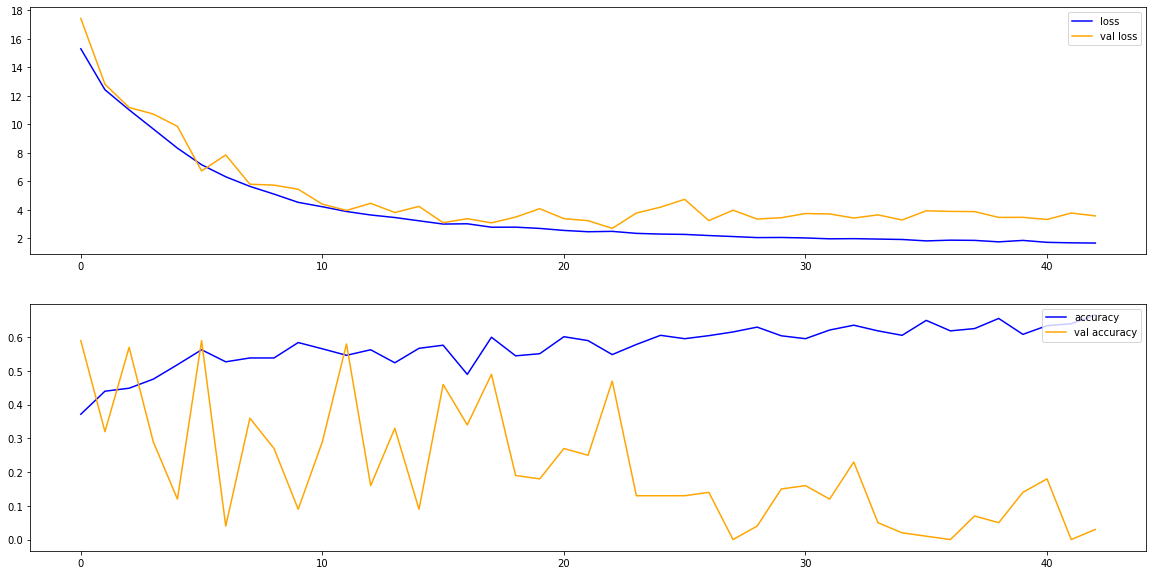

In [16]:
import os, shutil, glob
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

KERNEL_SHAPE=(3,3)
IMG_SHAPE=(150,150)
BATCH=100
EPOCHS=80
VAL_SPLIT = 0.8
TEST_SPLIT = 0.1

_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                    fname="flower_photos.tgz",
                                    extract=True)


def define_database_with_test():
    #returns two dirs: train and val
    base_dir=os.path.join(os.path.dirname(zip_file), 'flower_photos')
    print(base_dir)
    classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']
    for types in classes:
        img_dir=os.path.join(base_dir, types)
        images=glob.glob(img_dir+'/*.jpg')
        test = images[round(len(images)*(1-TEST_SPLIT)):]
        image_for_tr = images[:round(len(images)*(1-TEST_SPLIT))]
        train = image_for_tr[:round(len(images)*VAL_SPLIT)]
        val = image_for_tr[round(len(images)*VAL_SPLIT):]
        try:
            for t in train:
                if not os.path.exists(os.path.join(base_dir, 'train', types)):
                    os.makedirs(os.path.join(base_dir, 'train', types))
                shutil.move(t, os.path.join(base_dir, 'train', types))

            for v in val:
                if not os.path.exists(os.path.join(base_dir, 'val', types)):
                    os.makedirs(os.path.join(base_dir, 'val', types))
                shutil.move(v, os.path.join(base_dir, 'val', types))
            
            for t in test:
                if not os.path.exists(os.path.join(base_dir, 'test', types)):
                    os.makedirs(os.path.join(base_dir, 'test', types))
                shutil.move(t, os.path.join(base_dir, 'test', types))
        except: pass
    print("--- Database File Statistics ---\nTest: {} \nTrain:{} \nVal:{} \nVal+Train: {} \nAll: {}\n---"
    .format(len(test), len(train), len(val), len(images), (len(images)+len(test))))

    return os.path.join(base_dir, 'train'), os.path.join(base_dir, 'val'), os.path.join(base_dir, 'test'), len(train), len(val)

def define_database():
    #returns two dirs: train and val
    base_dir=os.path.join(os.path.dirname(zip_file), 'flower_photos')
    print(base_dir)
    classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']
    for types in classes:
        img_dir=os.path.join(base_dir, types)
        images=glob.glob(img_dir+'/*.jpg')
        image_for_tr = images[:round(len(images)*(1-TEST_SPLIT))]
        train = image_for_tr[:round(len(images)*VAL_SPLIT)]
        val = image_for_tr[round(len(images)*VAL_SPLIT):]
        try:
            for t in train:
                if not os.path.exists(os.path.join(base_dir, 'train', types)):
                    os.makedirs(os.path.join(base_dir, 'train', types))
                shutil.move(t, os.path.join(base_dir, 'train', types))

            for v in val:
                if not os.path.exists(os.path.join(base_dir, 'val', types)):
                    os.makedirs(os.path.join(base_dir, 'val', types))
                shutil.move(v, os.path.join(base_dir, 'val', types))
        except: pass
    print("--- Database File Statistics ---\nTrain:{} \nVal:{} \nVal+Train: {}\n---"
    .format(len(train), len(val), len(val)+len(train)))

    return os.path.join(base_dir, 'train'), os.path.join(base_dir, 'val'), len(train), len(val)
train_dir, val_dir, train_len, val_len = define_database()

def plot_image(x_arr, size=100):
    #Graph image layout is a square, so size arg must be a perfect square.
    fig=plt.figure(figsize=(15,15))
    for i, img in zip(range(size), x_arr):    
        plt.subplot(np.sqrt(size),np.sqrt(size), i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
    plt.tight_layout()
    plt.show()

def preprocess_data():   
    data_gen = ImageDataGenerator(
        shear_range=0.2,
        rotation_range=45,
        width_shift_range=0.15,
        height_shift_range=0.15,
        zoom_range=0.2,
        horizontal_flip=True,
        #fill_mode='nearest',
        rescale=(1./255)
    )
    val_data_gen = ImageDataGenerator(rescale=1./255)

    train_data_gen = data_gen.flow_from_directory(
        directory=train_dir,
        target_size=IMG_SHAPE,
        batch_size=BATCH,
        shuffle=True,
        class_mode='sparse',
    )
    val_data_gen = val_data_gen.flow_from_directory(
        directory=val_dir,
        target_size=IMG_SHAPE,
        batch_size=BATCH,
        shuffle=False,
        class_mode='sparse',
    )

    return train_data_gen, val_data_gen

train_data_gen, val_data_gen = preprocess_data()
def define_model(): 
    model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, KERNEL_SHAPE, 
            activation='relu', input_shape=(150,150,3), padding='same'),
        tf.keras.layers.MaxPool2D((2,2)),

        tf.keras.layers.Conv2D(32, KERNEL_SHAPE, 
            activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='L2'),
        tf.keras.layers.MaxPool2D((2,2)),

        tf.keras.layers.Conv2D(64, KERNEL_SHAPE, 
            activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='L2'),
            
        tf.keras.layers.Conv2D(128, KERNEL_SHAPE, 
            activation='relu', padding='same', kernel_initializer='he_uniform', kernel_regularizer='L2'),
        tf.keras.layers.MaxPool2D((2,2)),

        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='L2'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

model=define_model()
def train_model(): 
    hist = model.fit(
        train_data_gen,
        steps_per_epoch=int(np.ceil(train_len/float(BATCH))),
        validation_data=val_data_gen,
        validation_steps=int(np.ceil(val_len/float(BATCH))),
        epochs=EPOCHS,
        verbose=2,
        callbacks=[tf.keras.callbacks.EarlyStopping(verbose=1, patience=20)]
    )
    return hist

history = train_model()

def summarize_diagnostics():
    fig, ax = plt.subplots(2,1, figsize=(20,10))
    EPOCHS_RANGE=range(EPOCHS)
    ax[0].plot(history.history['loss'], color='b', label='loss')
    ax[0].plot(history.history['val_loss'], color='orange', label='val loss')
    ax[0].legend(loc='upper right')

    ax[1].plot(history.history['accuracy'], color='b', label='accuracy')
    ax[1].plot(history.history['val_accuracy'], color='orange', label='val accuracy')
    ax[1].legend(loc='upper right')
    plt.show()
summarize_diagnostics()

